# Explore data augmentations

This notebook will be used to test different data augmentation strategies. In your config file, you can modify the augmentations by adding `data_augmentation_options`. For example, I would like to add a random RGB to gray transform with a probability of 0.2:
```
data_augmentation_options {
    random_rgb_to_gray {
    probability: 0.2
    }
```

A complete list of augmentation is provided the [`preprocessor.proto` file of the Tf Object Detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto).

### Helper functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

In [2]:
def recenter_image(image):
    # ssd preprocessing
    image += [123.68, 116.779, 103.939]
    return image

def display_instances(image, bboxes, classes):
    image = recenter_image(image)
    w, h, _ = image.shape
    # resize the bboxes
    bboxes[:, [0, 2]] *= w
    bboxes[:, [1, 3]] *= h
    
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image.astype(np.uint8))
    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax.add_patch(rec)
    plt.show()

def display_batch(batch):
    # get images, bboxes and classes
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    batch_size = batched_images.shape[0]
    for idx in range(batch_size):
        display_instances(batched_images[idx, ...], 
                          batched_bboxes[idx, :num_bboxes[idx], :],
                          batched_classes[idx, ...])

### Display augmentations

In [3]:
from utils import get_train_input

In [5]:
train_dataset = get_train_input("../training/reference/pipeline_augmentation.config")

INFO:tensorflow:Reading unweighted datasets: ['/exercise/Object_Detection_Urban_Environment/data/training/segment-11940460932056521663_1760_000_1780_000_with_camera_labels.tfrecord', '/exercise/Object_Detection_Urban_Environment/data/training/segment-10584247114982259878_490_000_510_000_with_camera_labels.tfrecord', '/exercise/Object_Detection_Urban_Environment/data/training/segment-10734565072045778791_440_000_460_000_with_camera_labels.tfrecord', '/exercise/Object_Detection_Urban_Environment/data/training/segment-11623618970700582562_2840_367_2860_367_with_camera_labels.tfrecord', '/exercise/Object_Detection_Urban_Environment/data/training/segment-11839652018869852123_2565_000_2585_000_with_camera_labels.tfrecord', '/exercise/Object_Detection_Urban_Environment/data/training/segment-11199484219241918646_2810_030_2830_030_with_camera_labels.tfrecord', '/exercise/Object_Detection_Urban_Environment/data/training/segment-10975280749486260148_940_000_960_000_with_camera_labels.tfrecord', '

INFO:tensorflow:Reading record datasets for input file: ['/exercise/Object_Detection_Urban_Environment/data/training/segment-11940460932056521663_1760_000_1780_000_with_camera_labels.tfrecord', '/exercise/Object_Detection_Urban_Environment/data/training/segment-10584247114982259878_490_000_510_000_with_camera_labels.tfrecord', '/exercise/Object_Detection_Urban_Environment/data/training/segment-10734565072045778791_440_000_460_000_with_camera_labels.tfrecord', '/exercise/Object_Detection_Urban_Environment/data/training/segment-11623618970700582562_2840_367_2860_367_with_camera_labels.tfrecord', '/exercise/Object_Detection_Urban_Environment/data/training/segment-11839652018869852123_2565_000_2585_000_with_camera_labels.tfrecord', '/exercise/Object_Detection_Urban_Environment/data/training/segment-11199484219241918646_2810_030_2830_030_with_camera_labels.tfrecord', '/exercise/Object_Detection_Urban_Environment/data/training/segment-10975280749486260148_940_000_960_000_with_camera_labels.t

INFO:tensorflow:Number of filenames to read: 75
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filin

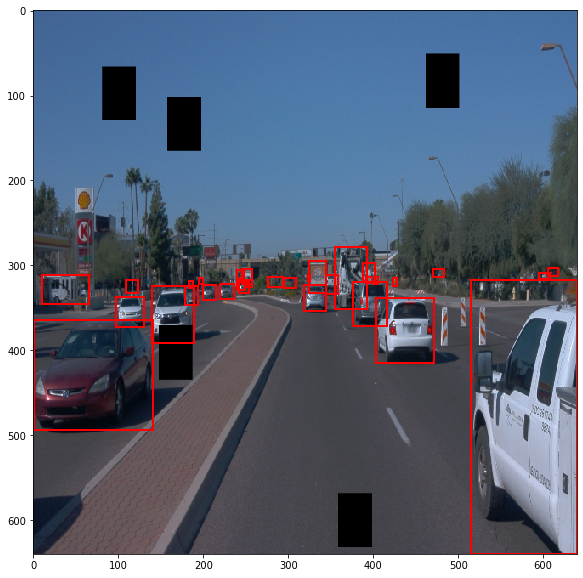

In [12]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)